#### Instruction:

For week 2 assignment, you should do the following:

* 1- create a jupyter notebook file

* 2- write some codes to read the example files (Example_Image, Example_Csv, Example_Excel, Example_Binary) located in assignment of week 2.

* 3- write at least one function to manipulate the read files. For example, print top rows in the data or show the image and resize/make it gray. You can do similar thing  with the binary file. You may wanna show some information inside of it or plot it. Similar scenario with the excel file is applied. All of these manipulations should be done in python codes.

* 4- provide some explanation about each file before and after reading the file in a "markdown" section in your notebook. This is toward to your improving your skills in providing some explanations about your findings in writing format. 

* 5- submit your files into your github branch. If you don't want to share your results early, you can keep it and submit it before class. 

## 1. Excel file
* Flat files are organized into 'row's and 'column's 
* Excel files are organized 
  * sheet
  * row 
  * column
* A single sheet correspondns to one or more sets of tabular data
* #### In the Excel file, the methods used are as follows
  * Load and check the basic information of the data from the Excel file
  * Accessing data frame elements by using .loc
  * Slicing data to see sepcific columns
  * Aggregating data using groupby and other statistics methods(mean(),max())
  * Plotting metods(bar plot, xylabel, subplots, etc.)
  

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
## load the data
fs = pd.read_excel(
    'Financial sample.xlsx' # location or url to the file
    
)
fs.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [38]:
# check the file shape, size
print(fs.shape)
print(fs.size)

(700, 16)
11200


In [39]:
# check the column names
fs.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

* Tips: the colums "Sales" has a comma in front which is " Sales".

In [40]:
## Access elements in the dataframe 
# Accessing the first row
print(fs.loc[0])  ## the result is a Series
# Accessing the "Sales" and "Gross Sales"column
print(fs[[" Sales","Gross Sales"]])  ## results in a dataframe 
# Accessing the value of the "Sales" of the first row
print(fs.loc[0,[" Sales"]])

Segment                         Government
Country                             Canada
Product                          Carretera
Discount Band                         None
Units Sold                          1618.5
Manufacturing Price                      3
Sale Price                              20
Gross Sales                          32370
Discounts                                0
 Sales                               32370
COGS                                 16185
Profit                               16185
Date                   2014-01-01 00:00:00
Month Number                             1
Month Name                         January
Year                                  2014
Name: 0, dtype: object
         Sales  Gross Sales
0     32370.00      32370.0
1     26420.00      26420.0
2     32670.00      32670.0
3     13320.00      13320.0
4     37050.00      37050.0
5    529550.00     529550.0
6     13815.00      13815.0
7     30216.00      30216.0
8     37980.00      37980.0
9     185

In [41]:
# extract some columns 
# get the Sales and Gross Sales of 2014 group by different countries
countrys = fs[fs.Year == 2014].groupby("Country")[' Sales', 'Gross Sales'].sum()
print(countrys)

                                 Sales  Gross Sales
Country                                            
Canada                    1.971177e+07   21376777.5
France                    1.922138e+07   20500791.5
Germany                   1.727761e+07   18291202.5
Mexico                    1.619493e+07   17576034.0
United States of America  1.990542e+07   21626006.0


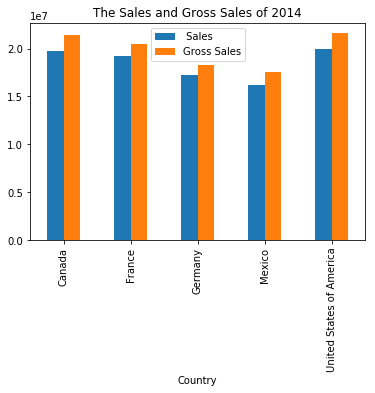

In [42]:
## plot a bar plot 
countrys.plot(kind = "bar")
plt.xticks(
    np.arange(len(countrys.index)),
    countrys.index, 
    rotation='vertical')
plt.title("The Sales and Gross Sales of 2014")

plt.show()

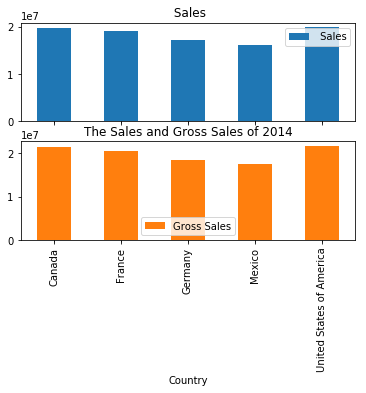

In [43]:
## plot with subplots
countrys.plot(kind = "bar", subplots = True)
plt.xticks(
    np.arange(len(countrys.index)),
    countrys.index, 
    rotation='vertical')
plt.title("The Sales and Gross Sales of 2014")
plt.show()

In [44]:
## compare the Sales and Gross Sales in 2013 versus to 2014 
Year_country = fs.groupby(["Year","Country"])[' Sales', 'Gross Sales'].sum()
print(Year_country)

                                      Sales  Gross Sales
Year Country                                            
2013 Canada                    5.175889e+06    5555386.0
     France                    5.132795e+06    5580883.0
     Germany                   6.227735e+06    6630265.0
     Mexico                    4.754421e+06    5150901.0
     United States of America  5.124415e+06    5643352.0
2014 Canada                    1.971177e+07   21376777.5
     France                    1.922138e+07   20500791.5
     Germany                   1.727761e+07   18291202.5
     Mexico                    1.619493e+07   17576034.0
     United States of America  1.990542e+07   21626006.0


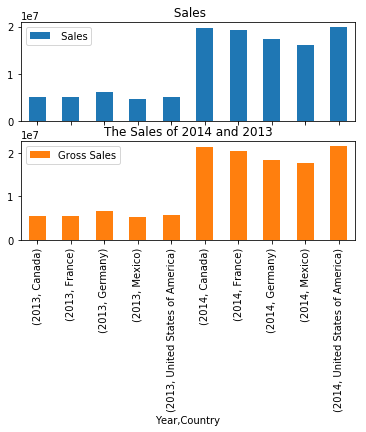

In [45]:
## plot the bar plot for The Average Sales of 2014 and 2013 
Year_country.plot(subplots = True, kind = "bar")
plt.title("The Sales of 2014 and 2013")

plt.show()

* #### The results of the 2013 and 2014 differ so much. It seems strange.
* #### Then I check and find out that it is because out of the 700 rows of the values, only has 135 rows of the 2013 which makes the sum of 2013 is much smaller than 2014 in the plot.

In [46]:
len(fs[fs["Year"]== 2013])

175

## 2. CSV files
* CSV (Comma separated values) are format of choice to exchange tabular data
    * Each line corresponds to a row
    * Each entry in the line corresponds to a column
    * Entries are separated by comma (,)
    * The first row contains the names of the columns
* Its a special case of tabular data with sep=','

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# load the file
df = pd.read_csv('Nuclei.csv')
# check the shape of the dataset
print(df.shape)
df.head()

(1244, 33)


,ImageNumber,ObjectNumber,Intensity_IntegratedIntensityEdge_DAPI,Intensity_IntegratedIntensityEdge_PI,Intensity_IntegratedIntensity_DAPI,Intensity_IntegratedIntensity_PI,Intensity_LowerQuartileIntensity_DAPI,Intensity_LowerQuartileIntensity_PI,Intensity_MADIntensity_DAPI,Intensity_MADIntensity_PI,...,Intensity_MinIntensityEdge_PI,Intensity_MinIntensity_DAPI,Intensity_MinIntensity_PI,Intensity_StdIntensityEdge_DAPI,Intensity_StdIntensityEdge_PI,Intensity_StdIntensity_DAPI,Intensity_StdIntensity_PI,Intensity_UpperQuartileIntensity_DAPI,Intensity_UpperQuartileIntensity_PI,Number_Object_Number
0,1,1,5.066987,4.504585,63.661448,26.980835,0.060006,0.035172,0.019913,0.001007,...,0.031388,0.031815,0.031388,0.005757,0.001566,0.029094,0.001507,0.107881,0.037224,1
1,1,2,4.461616,3.758312,52.943389,20.978958,0.055276,0.033928,0.033433,0.001694,...,0.028016,0.029816,0.027481,0.005620,0.002464,0.036908,0.002593,0.121820,0.037316,2
2,1,3,4.838346,2.810544,31.127337,12.375784,0.064607,0.030098,0.014519,0.000992,...,0.027512,0.038941,0.027512,0.007579,0.001566,0.019099,0.001467,0.092367,0.032090,3
3,1,4,3.235828,3.306371,38.797894,18.318380,0.040070,0.032624,0.028779,0.000977,...,0.028748,0.026749,0.028748,0.003096,0.001483,0.030482,0.001442,0.096674,0.034585,4
4,1,5,3.967391,3.223301,37.443107,15.369772,0.056352,0.032898,0.027031,0.001404,...,0.028244,0.031708,0.028153,0.005773,0.002650,0.030331,0.002118,0.110895,0.035672,5


After checking the colunm names and research online, here is what I found.
#### DAPI and PI  (Definition)
 * Refer to the fluorescent stain that binds strongly to adenine–thymine rich regions in DNA to stain living cell nuclei. 
 * It is used extensively in fluorescence microscopy. 
 * The integrated density of the DAPI and PI are generally used to quantify entry into nuclei.

### The sample seems to be a dataset of the different  objects of nuclei which are stained with the DAPI and PI. 
 * Each row refers to a object and has the values(colunms) of the descripitive statiatic of the DAPI and PI.
 * Totally 1244 objects in this image are located and analyzed.

   * Propidium iodide (PI) is a popular red-fluorescent nuclear and chromosome counterstain. 
   * Since propidium iodide and DAPI is not permeant to live cells, it is also commonly used to detect dead cells in a population. 
   * Higher integrated intensity, the more probability that the cell is not active.

##### So I decided to check the distribution of the indensity of the DAPI and PI


In [49]:
df.ObjectNumber
PI = pd.DataFrame({'IntegratedIntensity_PI': df.Intensity_IntegratedIntensity_PI})

In [50]:
PI.describe()
# PI.head()

,IntegratedIntensity_PI
count,1244.000000
mean,26.723821
std,38.306838
min,2.322469
25%,17.132189
50%,20.005997
75%,25.382410
max,705.432120


(array([1.205e+03, 1.700e+01, 6.000e+00, 9.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.32246892,  72.63343403, 142.94439915, 213.25536427,
        283.56632939, 353.8772945 , 424.18825962, 494.49922474,
        564.81018985, 635.12115497, 705.43212009]),
 <a list of 10 Patch objects>)

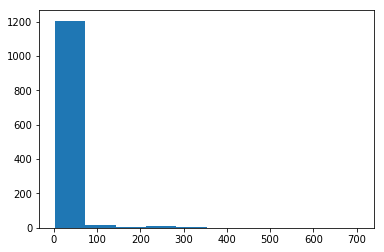

In [51]:
# histgram
plt.hist(df.Intensity_IntegratedIntensity_PI)

   * The descripitive statistic and the histgram showed that the integrated intensity of the PI has mainly distributed in the 0-100 areas（ the lower intensity areas）which means that the cells are more likely to be active.
   * The median is around 20 but it also has some large outliers which make the mean and the standard deviation become large.

    The scatter plot also reveal the results.

Text(0.5,1,'Scatter plot of the Integrated Intensity of PI')

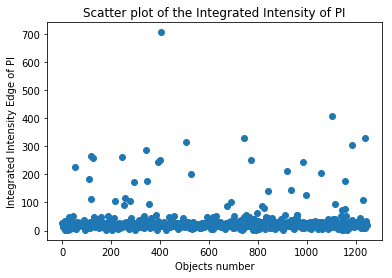

In [52]:
# Scatter plot of the IntegratedIntensity_PI
plt.scatter(df.ObjectNumber,df.Intensity_IntegratedIntensity_PI )
plt.xlabel('Objects number')
plt.ylabel('Integrated Intensity Edge of PI')
plt.title('Scatter plot of the Integrated Intensity of PI')

   * Check the histgram and the scatter plot of the integrated intensity of the DAPI, and can get the similar results that the integrated intensity of the DAPI is mainly between the 50-100.
   * It turns out that the results of the staining with DAPI and the PI can be applied to analysis the distribution and location of the cells.

(array([104., 694., 366.,  25.,  27.,  19.,   6.,   1.,   0.,   2.]),
 array([  4.78538186,  34.57521788,  64.3650539 ,  94.15488992,
        123.94472594, 153.73456195, 183.52439797, 213.31423399,
        243.10407001, 272.89390603, 302.68374205]),
 <a list of 10 Patch objects>)

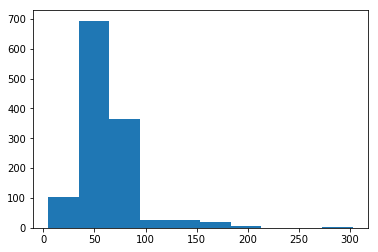

In [53]:
# histgram
plt.hist(df.Intensity_IntegratedIntensity_DAPI)

Text(0.5,1,'Scatter plot of the Integrated Intensity of DAPI')

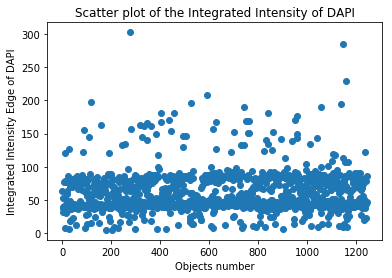

In [54]:
# Scatter plot of the IntegratedIntensity_DAPI
plt.scatter(df.ObjectNumber,df.Intensity_IntegratedIntensity_DAPI )
plt.xlabel('Objects number')
plt.ylabel('Integrated Intensity Edge of DAPI')
plt.title('Scatter plot of the Integrated Intensity of DAPI')

Text(0.5,1,'Scatter plot of the DAPI and PI')

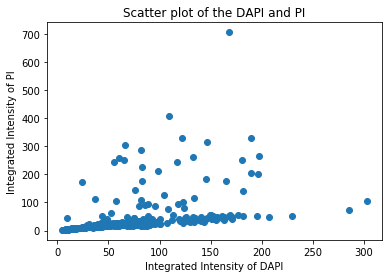

In [55]:
# Scatter plot of the IntegratedIntensity_PI VS IntegratedIntensity_DAPI
plt.scatter(df.Intensity_IntegratedIntensity_DAPI, df.Intensity_IntegratedIntensity_PI)
plt.xlabel('Integrated Intensity of DAPI')
plt.ylabel('Integrated Intensity of PI')
plt.title('Scatter plot of the DAPI and PI')

    This scatter plot reveals that the most of the objects are spotted in the areas which has lower integrated indesity of both DAPI and PI. It matches the characteristics of the DAPI and PI.

## 3. Image file
* package use : Pillow(PIL)
* #### Basic Image function including
  * open image file
  * display image
  * covert image to gray
  * etc.

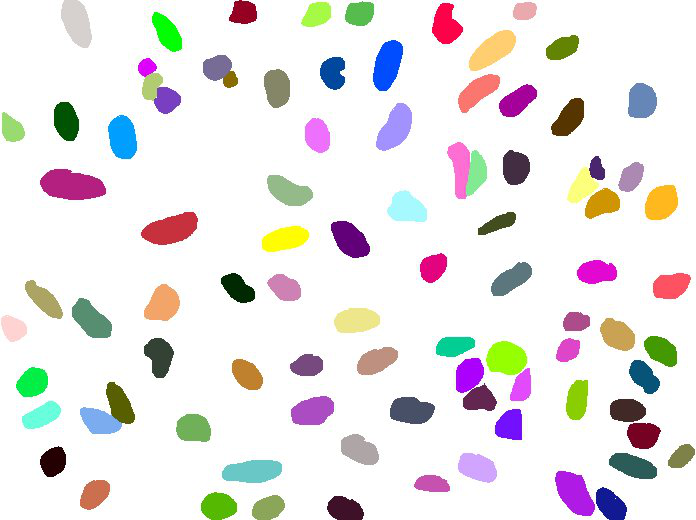

In [56]:
from PIL import Image, ImageFilter
# Read image
img = Image.open("Nuclei_Msk.jpg")
# Display image
img

In [57]:
# check the image's format, size, mode
print (img.format, img.size, img.mode)

JPEG (696, 520) RGB


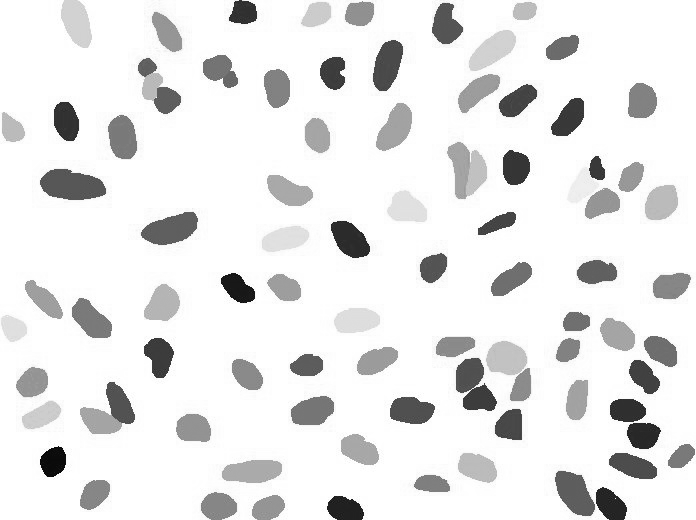

In [58]:
gray = img.convert('L')
gray

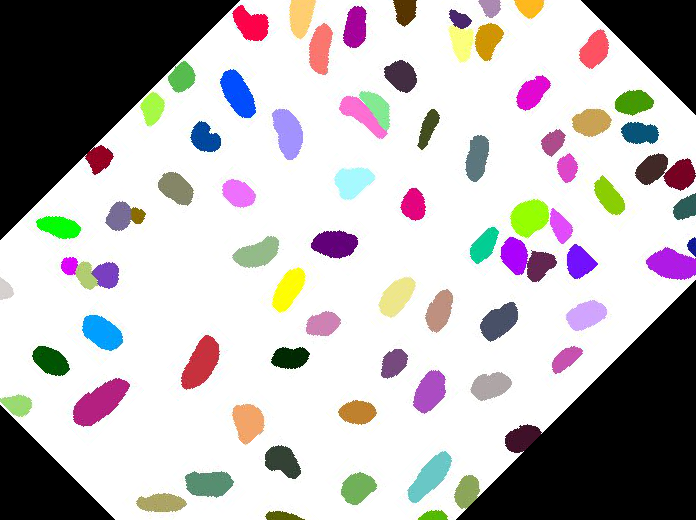

In [59]:
# rotate the image 45 degrees counterclockwise
rorate1 = img.rotate(45)
rorate1

In [60]:
# rotate the image 90 degrees counterclockwise
rorate2 = img.transpose(Image.ROTATE_90)
rorate2.show()

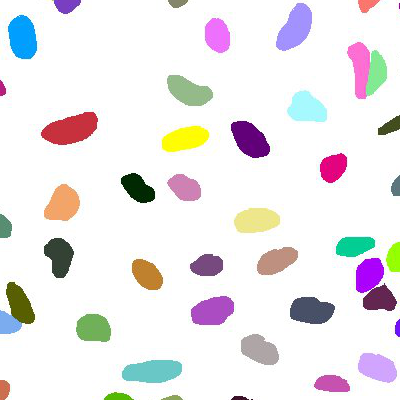

In [61]:
# cut the image
box = (100, 100, 500, 500)
region = img.crop(box)
region

In [459]:
# generate a thumbnail
img.thumbnail((128, 128))
img.show()
# save the thumbnail
img.save('Nuclei_thumb.jpg', 'JPEG')

In [460]:
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
bw.show()

## 4. ABF file
### Defination
* #### After researching online, I found that the electrophysiological data produced by theses systems is saved in Axon Binary Format (ABF) files. 
* #### The field of cellular electrophysiology uses highly-sensitive voltage and current measurement devices to gain insights into the electrical properties of biological membranes.
* #### Based on some guideds and tutorial of the ABF file on Github, I tried to figure out the file as follows.


In [71]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import struct

In [74]:
# Load an ABF File
import pyabf
abf = pyabf.ABF("16o03002.abf")
print(abf)

ABF file (16o03002.abf) with 2 channels, 6 sweeps, and a total length of 0.10 min.


In [75]:
# access sweep data
import pyabf
abf = pyabf.ABF("16o03002.abf")
abf.setSweep(5)  # sweeps start at 0
print(abf.sweepY)  # sweep data (ADC)
print(abf.sweepC)  # sweep command (DAC)
print(abf.sweepX) 

[-61.523438 -61.73706  -61.523438 ... -61.12671  -60.913086 -61.00464 ]
[nan nan nan ... nan nan nan]
[0.000e+00 1.000e-04 2.000e-04 ... 9.997e-01 9.998e-01 9.999e-01]


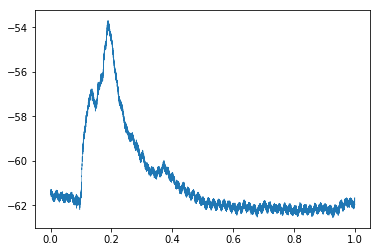

In [76]:
# Plot Sweep-1 Data
import pyabf
abf = pyabf.ABF("16o03002.abf")
abf.setSweep(1)
plt.plot(abf.sweepX, abf.sweepY, lw=.5)
plt.show()

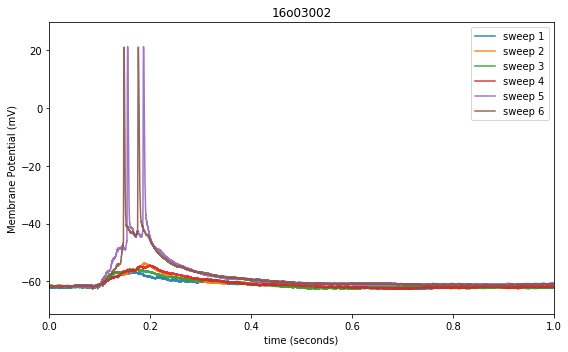

In [85]:
# plot the whole 6 sweeps

plt.figure(figsize=(8, 5))
for sweepNumber in range(abf.sweepCount)[::1]:
    abf.setSweep(sweepNumber)
    plt.plot(abf.sweepX,abf.sweepY,alpha=.9,label=f"sweep {sweepNumber+1}")

plt.margins(0, .1)
plt.legend()
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
plt.title(abf.abfID)
plt.tight_layout()
plt.show()



In [78]:
# Writing a Function to Read Structured Data
def readStruct(f, structFormat, seekTo=-1):
  if seekTo>=0:
    f.seek(seekTo)
  byteCount = struct.calcsize(structFormat)
  byteString = f.read(byteCount)
  value = struct.unpack(structFormat, byteString)
  return list(value)

In [79]:
# Reading Data from DataSection
# find blockNumber, byteCount, and itemCount:
f = open("16o03002.abf", 'rb')
DataSection = readStruct(f, "IIl", 236)
print(DataSection)
f.close()

[13, 2, 120000]


#### This will reveal the blockNumber, byteCount, and itemCount:
    ABF data starts at byte 6656 (13*512)
    Each data point is 2 bytes (probably 16-bit integers)
    There are 1,200,000 data points in this file


* Numpy is a Python package which is optimized for working with large amounts of multidimensional numerical data, and it has a function to read structured data directly from binary files into numpy arrays. We can use numpy for handling all ABF data :

In [80]:
import numpy as np
f = open("16o03002.abf", 'rb')
DataSection = readStruct(f, "IIl", 236)
f.seek(DataSection[0]*512)
data = np.fromfile(f, dtype=np.int16, count=DataSection[2])
f.close()
print(data)

[-2027     2 -2030 ...     2 -1999     2]


    Since the file has two channels,data from each channel is interleaved. We should plot every other data point.
    

In [81]:
## seperate the data by channels
f = open("16o03002.abf", 'rb')
DataSection = readStruct(f, "IIl", 236)
ADCSection = readStruct(f, "IIl", 92) ## get the number of channel
channelCount = ADCSection[2]
f.seek(DataSection[0]*512)
data = np.fromfile(f, dtype=np.int16, count=DataSection[2])
data = np.reshape(data, (int(len(data)/channelCount), channelCount)) ## reshape the data to seperate the 2 channels
data = np.rot90(data)[::-1]  ## change 2 columns to two rows and reverse the order
f.close()
print(data)

[[-2027 -2030 -2033 ... -2003 -1996 -1999]
 [    2     3    -2 ...    -1     2     2]]


    The final result is an n-dimensional numpy array where every row is an ADC channel.
    Then plot the 2 channels

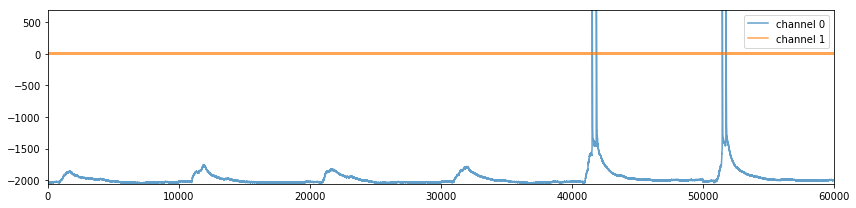

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
for channel in range(channelCount):
    plt.plot(data[channel], label=f"channel {channel}", alpha=.7)
plt.margins(0,0)
plt.tight_layout()
#plt.axis([250_000, 425_000, -2300, 1700])
plt.legend()
plt.show()


    Horizontal units can be converted to seconds by dividing by the sample rate. 

    Vertical units can be converted to true units by multiplying the data by a scaling factor which has to be calculated from a variety of header values. Since the data originated as int16, the output of the ADC will span 2^16 units centered at 0 (-32,768 to 32,768), and hence this data is much larger vertically than expected. 

    How to determine the sample rate and how to determine the scaling factor needs more studing and researching.